# Ejercicio 2: Pasos Fronterizos
1. Descargar dataset en JSON:
    * Pasos Fronterizos
2. Graficar un histograma agrupando por valor del atributo “province”.
 
 

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [27]:
tabla_2 = pd.read_json("../input/pasos.json")
tabla_2.head(5)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz


In [28]:
tabla_2.province.unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'Córdoba',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

In [29]:
provinces_len = tabla_2.province.unique().size
print('Hay {} valores diferentes en el atributo "province" del data set'.format(provinces_len))

Hay 25 valores diferentes en el atributo "province" del data set


**Observaciones**

* El valor "AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ" no es una provincia pero pertenece a Santa Cruz
    * si es un valor corrupto, podría limpiarse/eliminarse del data set
* Los valores "Neuquen" y "NEUQUEN" se corresponden con la misma provincia
    * podrían unificarse para que estén en un mismo valor
* Los valores "Córdoba" y "Cordoba" se corresponden con la misma provincia
    * podrían unificarse para que estén en un mismo valor

Se deciden implementar las acciones de las alternativas propuestas

-------------------------

In [30]:
tabla_2[tabla_2.province == 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ']

,location,name,province
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...


In [31]:
tabla_2.loc[15].province = 'Santa Cruz'

In [32]:
tabla_2[tabla_2.province == 'NEUQUEN']

,location,name,province
48,"[-38.833809, -71.2745511]",PASO ICALMA,NEUQUEN


In [33]:
tabla_2.loc[48].province = 'Neuquen'

In [34]:
tabla_2[tabla_2.province == 'Córdoba']

,location,name,province
119,"[-36.5938265, -64.2811118]",AERO SANTA ROSA,Córdoba


In [35]:
tabla_2.loc[119].province = 'Cordoba'

In [36]:
provinces_len = tabla_2.province.unique().size
print('Quedaron {} provincias en el atributo "province" del data set'.format(provinces_len))

Quedaron 22 provincias en el atributo "province" del data set


In [37]:
tabla_2.province.value_counts(normalize=False,
                              dropna=False,
                              sort=False)

Santiago del Estero     4
Santa Cruz             21
Salta                   4
Formosa                11
Jujuy                   8
Mendoza                14
San Luis                2
San Juan                5
Tierra del Fuego        9
Misiones               38
Corrientes             15
La Rioja                3
Chubut                 15
Tucuman                 2
Catamarca               3
Chaco                   3
Entre Rios             13
Cordoba                 4
Santa Fe               11
Buenos Aires           48
Neuquen                11
Rio Negro               8
Name: province, dtype: int64

**Gráficos**

A continuación se muestran las frecuencias de cada uno de los valores de "province"

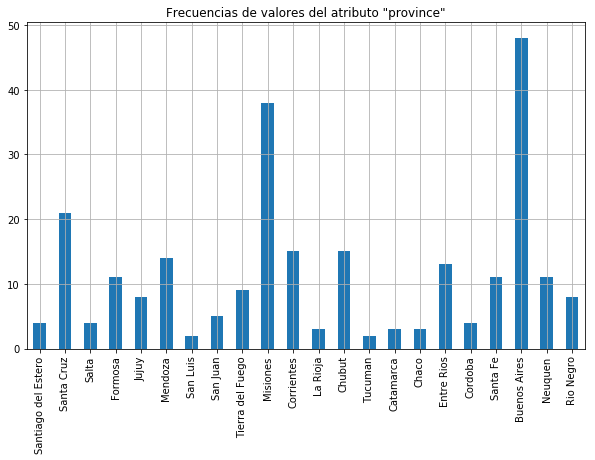

In [38]:
tabla_2.province.value_counts(normalize=False,
                              dropna=False,
                              sort=False).plot(kind='bar',
                                               title='Frecuencias de valores del atributo "province"',
                                               grid=True,
                                               figsize=(10,6))

Por último, graficamos el histograma de las frecuencias de cada uno de los valores de "province"

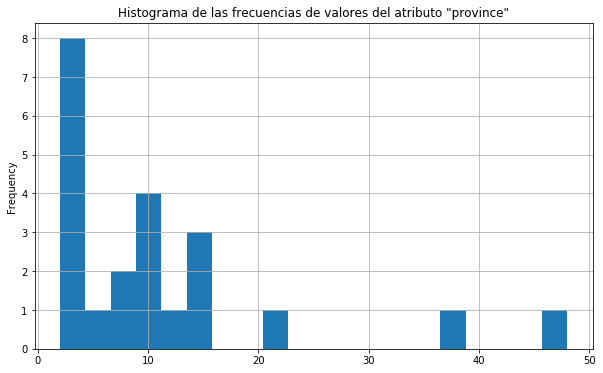

In [39]:
tabla_2.province.value_counts(normalize=False,
                              dropna=False,
                              sort=False).plot(kind='hist',
                                               bins=20,
                                               title='Histograma de las frecuencias de valores del atributo "province"',
                                               grid=True,
                                               figsize=(10,6))